In [2]:
# load dependencies'
import similaritymeasures
import movingpandas as mpd
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from envirocar import *

In [3]:
# create an initial but optional config and an api client
config = ECConfig()
track_api = TrackAPI(api_client=DownloadClient(config=config))
preprocessing = Preprocessing()
track_converter = TrackConverter()

Initializing pre-processing class
Initializing TrackConverter class


In [4]:
bbox = BboxSelector([
    7.5, # min_x
    51.5, # min_y
    7.7, # max_x
    52  # max_y
])

# issue a query
track_df = track_api.get_tracks(bbox=bbox, num_results=50) 

In [5]:
trajCollection = preprocessing.trajectoryCollection(track_df, 100)

Finished creating 50 trajectories


In [6]:
single_track_id = track_df['track.id'].unique()[1]
single_track_id2 = track_df['track.id'].unique()[6]
single_track_id3 = track_df['track.id'].unique()[15]
single_track_id4 = track_df['track.id'].unique()[25]

trajA=trajCollection.get_trajectory(single_track_id)
trajB=trajCollection.get_trajectory(single_track_id2)
trajC=trajCollection.get_trajectory(single_track_id3)
trajD=trajCollection.get_trajectory(single_track_id4)

In [7]:
print('##### Track:',trajA.df['track.id'].unique()[0],"and",trajC.df['track.id'].unique()[0],"#####")
print('Similarity with pmc method:\t\t',track_similarity(trajA,trajC,'pcm'))
print('Similarity with area method:\t\t',track_similarity(trajA,trajC,'area_between_two_curves'))
print('Similarity with length method:\t\t',track_similarity(trajA,trajC,'curve_length_measure'))
print('Similarity with frechet method:\t\t',track_similarity(trajA,trajC,'frechet_dist'))
print('Similarity with DTW method\t\t',track_similarity(trajA,trajC,'dtw'))

##### Track: 5ef23e7dd6e3cf256b123de2 and 5ef033c0d6e3cf256be0bf0a #####
Similarity with pmc method:		 0.037608327462745554
Similarity with area method:		 0.9997594937239195
Similarity with length method:		 0.9939832469850219
Similarity with frechet method:		 0.9813397892859853
Similarity with DTW method		 0.4164070947476015


In [8]:
trajVector=[]
for i in (trajCollection.trajectories):
    trajVector.append(i)

df_clm=crossed_similarity(trajVector,'curve_length_measure')

100.0% of calculations
1225 similarity measures in 121.01 seconds


In [9]:
df_clm_matrix = get_similarity_matrix(df_clm)

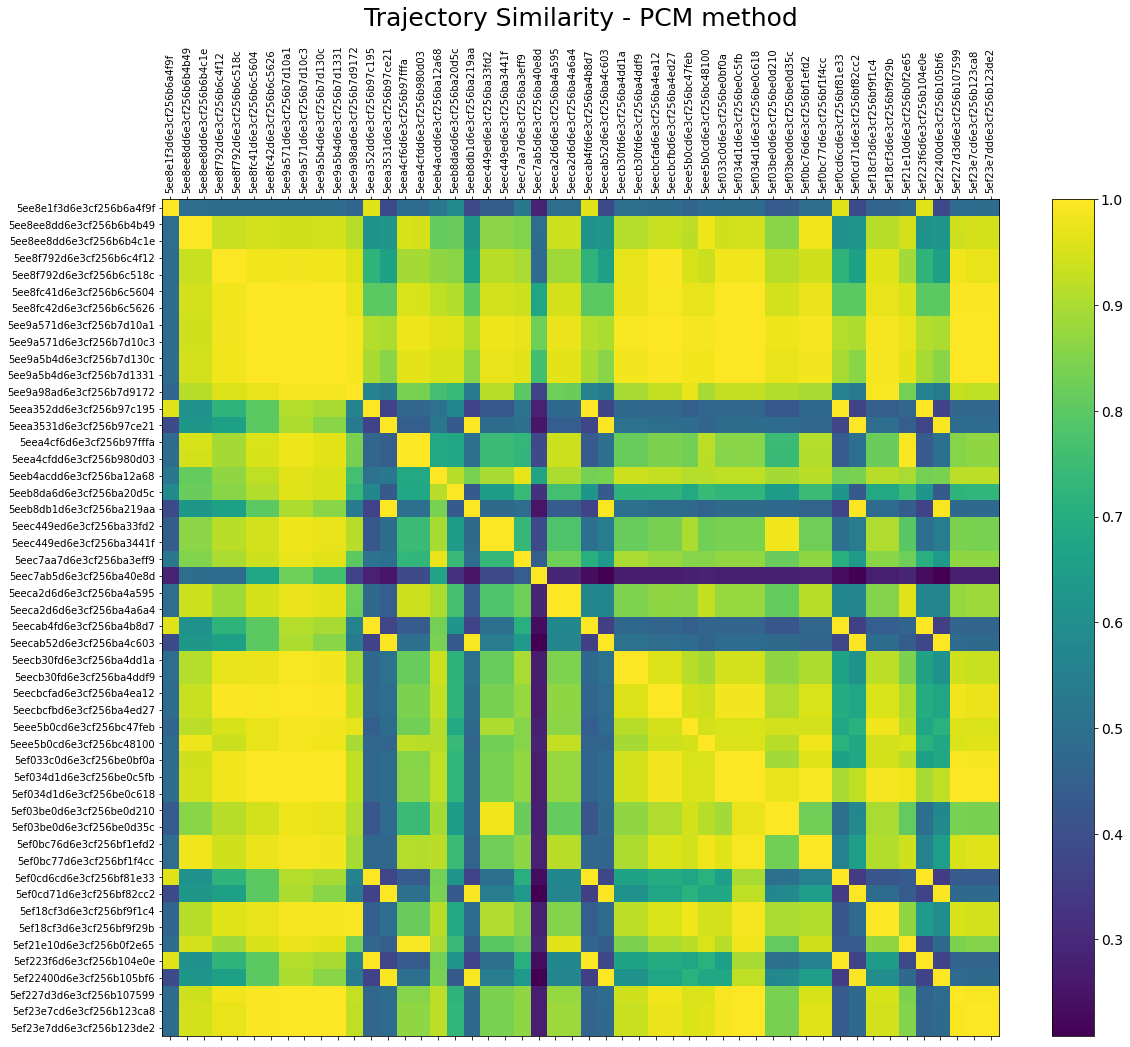

In [10]:
plot_similarity_matrix(df_clm_matrix,'Trajectory Similarity - PCM method')